### Instalação de Bibliotecas Necessárias

In [2]:
!python -m pip install ipykernel pandas numpy matplotlib seaborn scipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


### Importação das bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Carregando o conjunto de dados

In [2]:
data = pd.read_csv("pref_salvador_full.csv", delimiter=";")

### Limpeza dos Dados

In [18]:
# OBS: Essa parte do código deveria ser feito no 'Transformation Layer', porém por ser pouca transformação, fizemos aqui.

# Verifica valores em falta
valores_em_falta = data.isnull().sum()

valores_em_falta

id                                            0
cpf                                           0
nome                                          0
vinculo                                       0
situacao                                      0
salario                                       0
margem_desconto                               0
margem_liquido                                0
margem_cartao_bruto                           0
margem_cartao_desconto                        0
margem_cartao_liquido                         0
margem_cartao_beneficio_bruto_compra          0
margem_cartao_beneficio_desconto_compra       0
margem_cartao_beneficio_liquido_compra        0
margem_cartao_beneficio_bruto_saque           0
margem_cartao_beneficio_desconto_saque        0
margem_cartao_beneficio_liquido_saque         0
razao_emprestimo_salario                   1718
faixa_salarial                             1718
dtype: int64

In [ ]:
# Lida com valores em falta com base nos seus dados, ou faz a imputação deles
data = data.dropna()

> Pré-processamento de Dados

> Não é necessário fazer conversões para dados numéricos, pois 'salario' já é numérico.

### Análise Exploratória de Dados (EDA)

In [4]:
# Estatísticas Resumidas
estatisticas_resumidas = data.describe()

estatisticas_resumidas

,id,cpf,salario,margem_desconto,margem_liquido,margem_cartao_bruto,margem_cartao_desconto,margem_cartao_liquido,margem_cartao_beneficio_bruto_compra,margem_cartao_beneficio_desconto_compra,margem_cartao_beneficio_liquido_compra,margem_cartao_beneficio_bruto_saque,margem_cartao_beneficio_desconto_saque,margem_cartao_beneficio_liquido_saque
count,35059.000000,35059.000000,35059.000000,35059.000000,35059.000000,35059.000000,35059.0,35059.000000,35059.000000,35059.0,35059.000000,35059.000000,35059.0,35059.000000
mean,18930.303802,49743.419065,1450.346113,31.994715,948.480413,414.384622,0.0,327.759404,414.384441,0.0,371.544553,290.069002,0.0,256.453581
std,10908.893730,28893.812070,1059.563662,155.307417,1095.561275,302.732580,0.0,325.246235,302.732636,0.0,315.447031,211.912873,0.0,223.317144
min,1.000000,115.000000,0.000000,0.000000,-2296.950000,0.000000,0.0,-2586.330000,0.000000,0.0,-287.880000,0.000000,0.0,-287.880000
25%,9457.500000,24572.000000,847.435000,0.000000,101.610000,242.125000,0.0,120.430000,242.130000,0.0,180.670000,169.490000,0.0,118.860000
50%,19042.000000,50500.000000,1159.670000,0.000000,695.260000,331.330000,0.0,275.010000,331.330000,0.0,316.730000,231.930000,0.0,221.710000
75%,28350.500000,74553.000000,1897.230000,0.000000,1345.280000,542.065000,0.0,447.190000,542.060000,0.0,503.995000,379.445000,0.0,352.185000
max,37732.000000,99883.000000,11636.410000,6729.800000,10269.260000,3324.690000,0.0,3324.690000,3324.690000,0.0,3324.690000,2327.280000,0.0,2327.280000


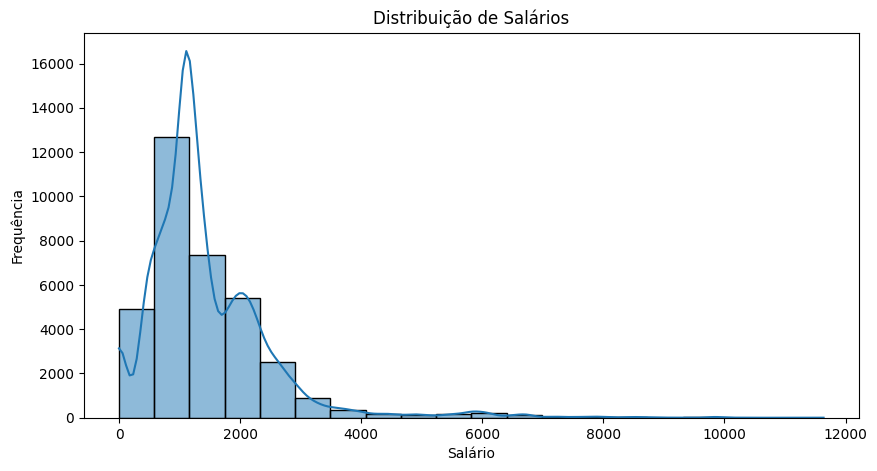

In [5]:
# Distribuição de Salários
plt.figure(figsize=(10, 5))
sns.histplot(data['salario'], bins=20, kde=True)
plt.title('Distribuição de Salários')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.show()

### Matriz de Correlação

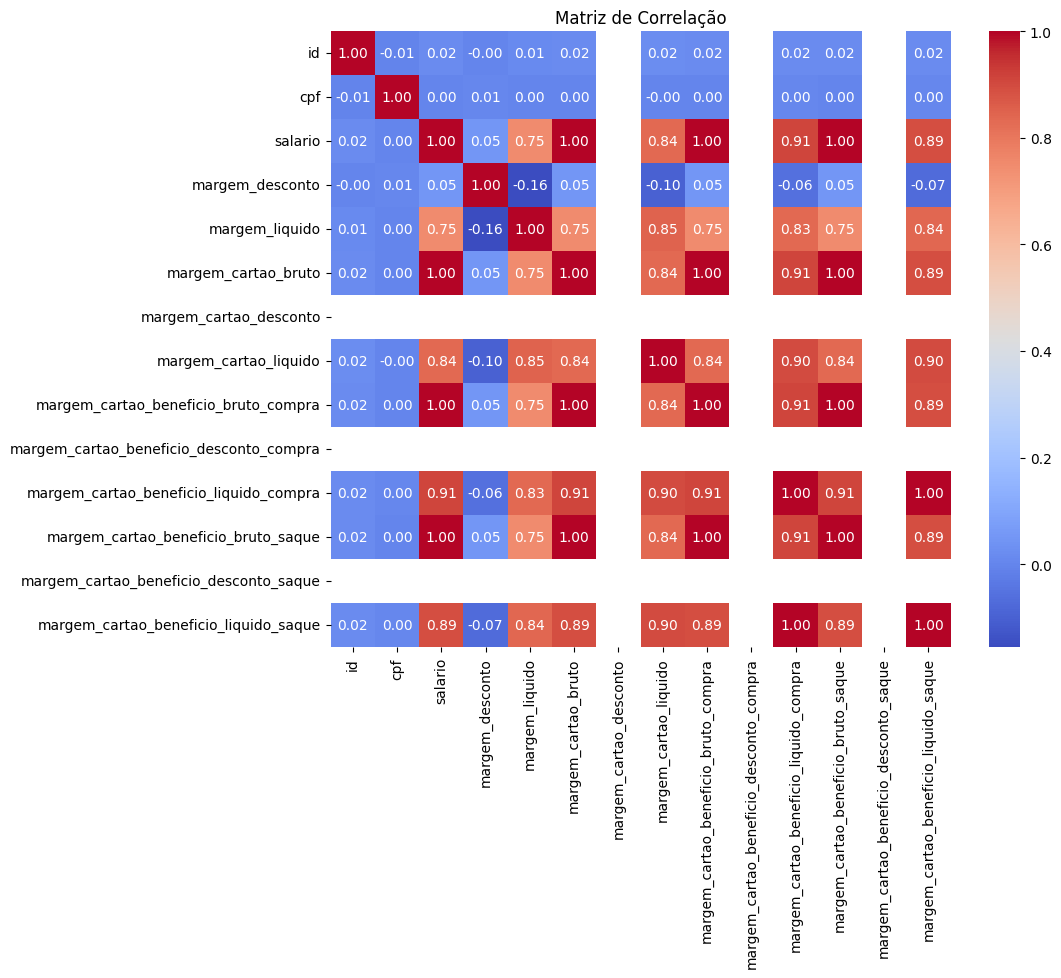

In [6]:
# Filtrando apenas as colunas numéricas para a matriz de correlação
colunas_numericas = data.select_dtypes(include=['float64', 'int64'])

# Análise de correlação
correlation_matrix = colunas_numericas.corr()

# Visualize Matriz de Correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### Razão entre empréstimo e salário

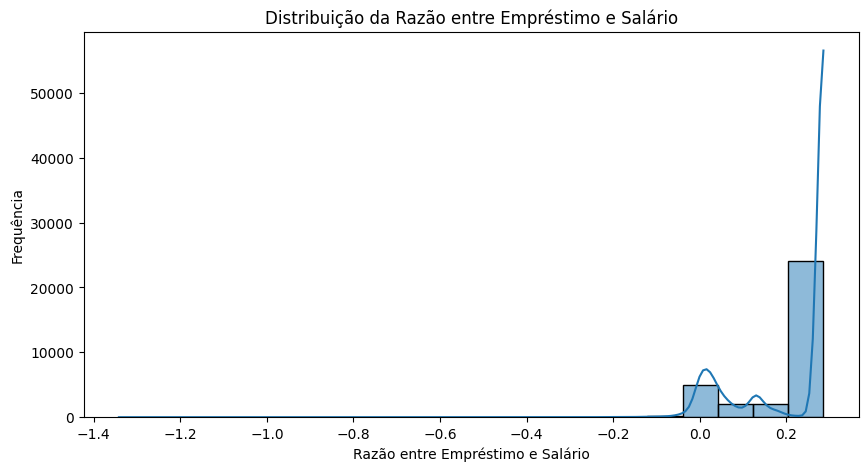

In [8]:
# Calculo da razão entre empréstimo e salário
data['razao_emprestimo_salario'] = data['margem_cartao_liquido'] / data['salario']

# Distribuição da Razão entre Empréstimo e Salário
plt.figure(figsize=(10, 5))
sns.histplot(data['razao_emprestimo_salario'], bins=20, kde=True)
plt.title('Distribuição da Razão entre Empréstimo e Salário')
plt.xlabel('Razão entre Empréstimo e Salário')
plt.ylabel('Frequência')
plt.show()

#### Análise de Empréstimos (Assumindo que se trata de empréstimos consignados)
> Teste de Hipótese (Exemplo: Testar se a aprovação de empréstimo é influenciada pelo salário)

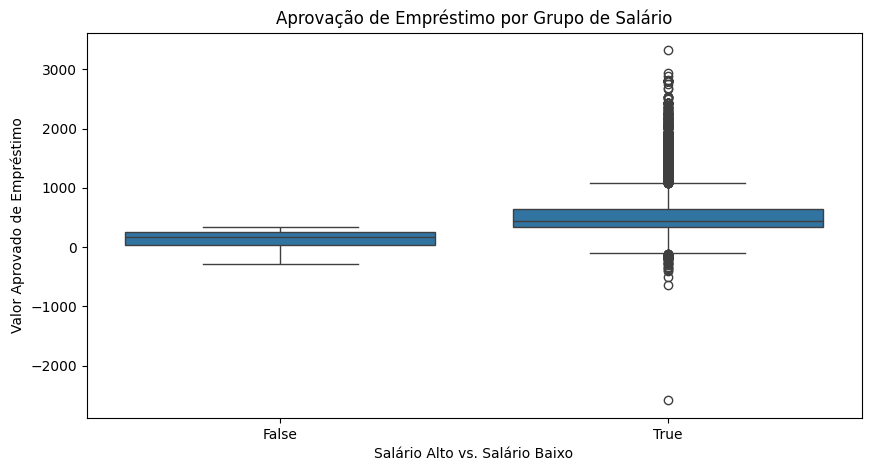

In [9]:
# Define dois grupos com base no salário
salario_alto = data[data['salario'] > data['salario'].median()]
salario_baixo = data[data['salario'] <= data['salario'].median()]

# Realiza um teste para verificar se há uma diferença significativa nas taxas de aprovação de empréstimo
t_stat, p_value = stats.ttest_ind(salario_alto['margem_cartao_liquido'], salario_baixo['margem_cartao_liquido'])

# Visualiza a diferença
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['salario'] > data['salario'].median(), y=data['margem_cartao_liquido'])
plt.title('Aprovação de Empréstimo por Grupo de Salário')
plt.xlabel('Salário Alto vs. Salário Baixo')
plt.ylabel('Valor Aprovado de Empréstimo')
plt.show()

### Análises com base no grupo de faixa salarial

##### Análise da Taxa de Aprovação de Empréstimos por Faixa Salarial

In [10]:
# Dividi os dados em grupos com base nas faixas salariais
data['faixa_salarial'] = pd.cut(data['salario'], bins=[0, 2000, 4000, 6000, 8000, 10000, float('inf')],
                               labels=['< 2k', '2k - 4k', '4k - 6k', '6k - 8k', '8k - 10k', '>= 10k'])
taxa_aprovacao_por_faixa = data.groupby('faixa_salarial')['id'].count() / len(data)

/tmp/ipykernel_9787/3658476574.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_aprovacao_por_faixa = data.groupby('faixa_salarial')['id'].count() / len(data)


#### Análise da Taxa de Inadimplência por Faixa Salarial

In [11]:
inadimplencia_por_faixa = data[data['situacao'] == 'inadimplente'].groupby('faixa_salarial')['id'].count() / data.groupby('faixa_salarial')['id'].count()

/tmp/ipykernel_9787/2554602093.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inadimplencia_por_faixa = data[data['situacao'] == 'inadimplente'].groupby('faixa_salarial')['id'].count() / data.groupby('faixa_salarial')['id'].count()


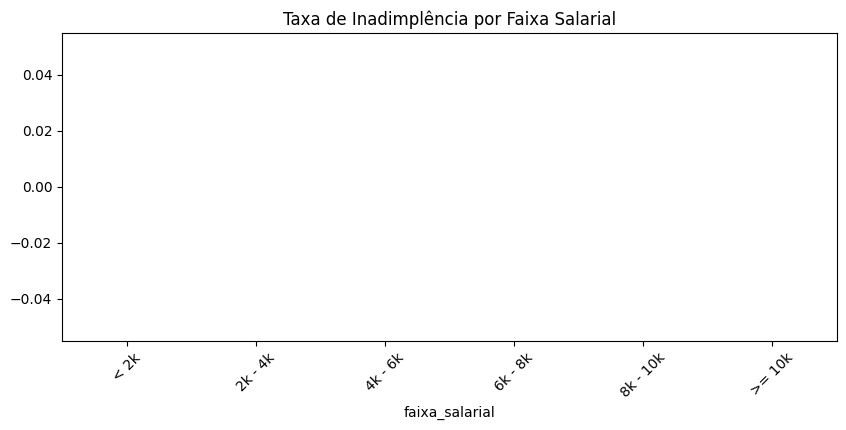

In [12]:
plt.figure(figsize=(10, 4))
sns.barplot(x=inadimplencia_por_faixa.index, y=inadimplencia_por_faixa.values)
plt.title('Taxa de Inadimplência por Faixa Salarial')
plt.xticks(rotation=45)
plt.show()

#### Análise da Margem de Desconto Média por Faixa Salarial

In [13]:
margem_desconto_media_por_faixa = data.groupby('faixa_salarial')['margem_desconto'].mean()

/tmp/ipykernel_9787/2524650530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  margem_desconto_media_por_faixa = data.groupby('faixa_salarial')['margem_desconto'].mean()


#### Análise da Margem Líquida Média por Faixa Salarial

In [14]:
margem_liquida_media_por_faixa = data.groupby('faixa_salarial')['margem_liquido'].mean()

/tmp/ipykernel_9787/516059555.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  margem_liquida_media_por_faixa = data.groupby('faixa_salarial')['margem_liquido'].mean()


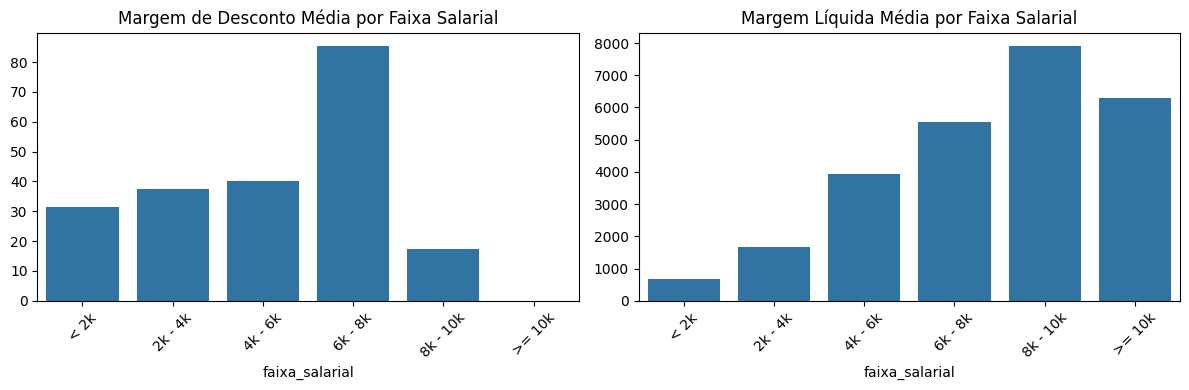

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=margem_desconto_media_por_faixa.index, y=margem_desconto_media_por_faixa.values)
plt.title('Margem de Desconto Média por Faixa Salarial')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.barplot(x=margem_liquida_media_por_faixa.index, y=margem_liquida_media_por_faixa.values)
plt.title('Margem Líquida Média por Faixa Salarial')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Salva o conjunto de dados limpo

In [16]:
data.to_csv("pref_salvador_clean.csv", index=False)